# Q-2: Problem Statement
Imagine you have a dataset where you have different features like Age, Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

**Link-** https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Data Loading

In [2]:
filepath = os.path.join(os.getcwd(), 'Datasets', 'ObesityDataSet_raw_and_data_sinthetic.csv')
df = pd.read_csv(filepath)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Data Understanding

In [3]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No null values in data

In [5]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Data Analysis

In [6]:
target_variable = "NObeyesdad"

In [7]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes(np.object)

In [8]:
# Categorizing obesity classes into Normal , Overweight , Obesity , Underweight , and Extreme Obesity as required
df[target_variable] = df [target_variable].replace({'Obesity_Type_I':'Obesity',
                                                    'Obesity_Type_II':'Extreme_Obesity',
                                                   'Obesity_Type_III':'Extreme_Obesity',
                                                    'Overweight_Level_II':'Overweight',
                                                    'Overweight_Level_I':'Overweight',
                                                    'Overweight_Level_I':'Overweight',
                                                    'Normal_Weight':'Normal',
                                                    'Insufficient_Weight':'Underweight'})

## Univariate

### Numeric:

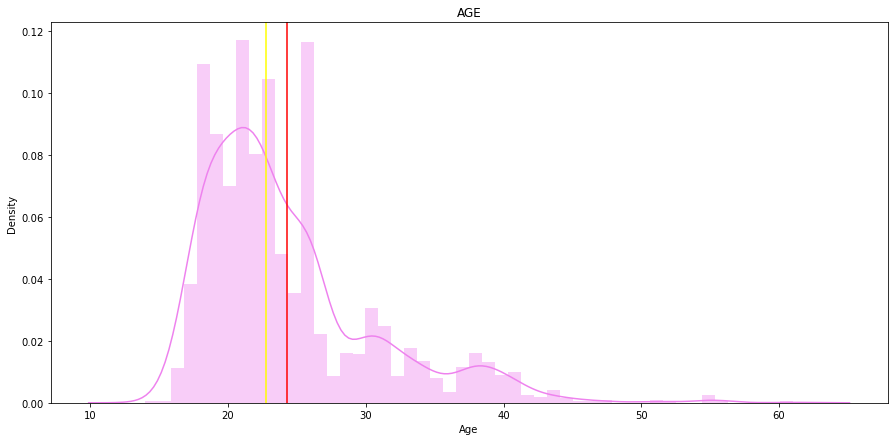

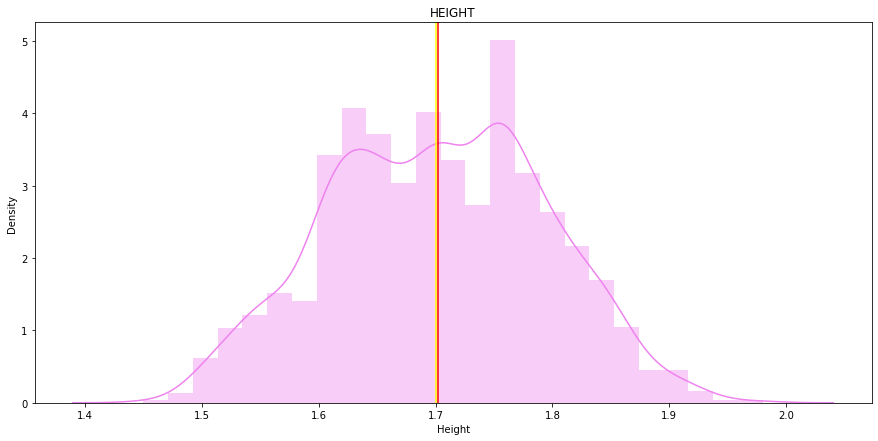

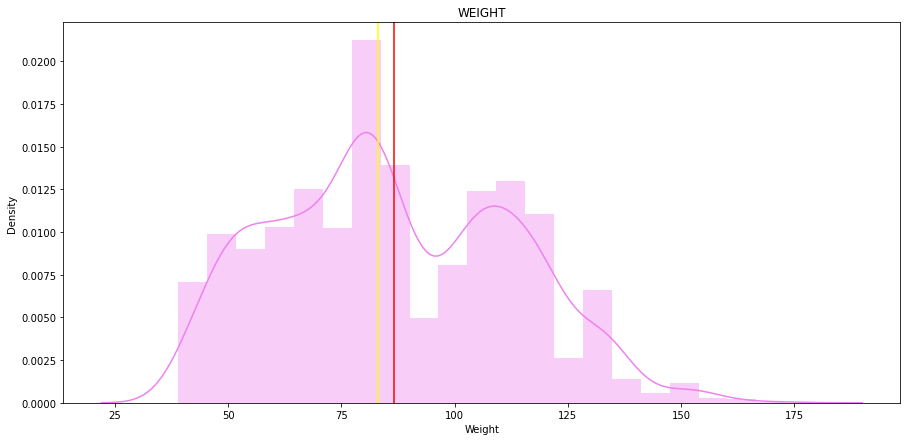

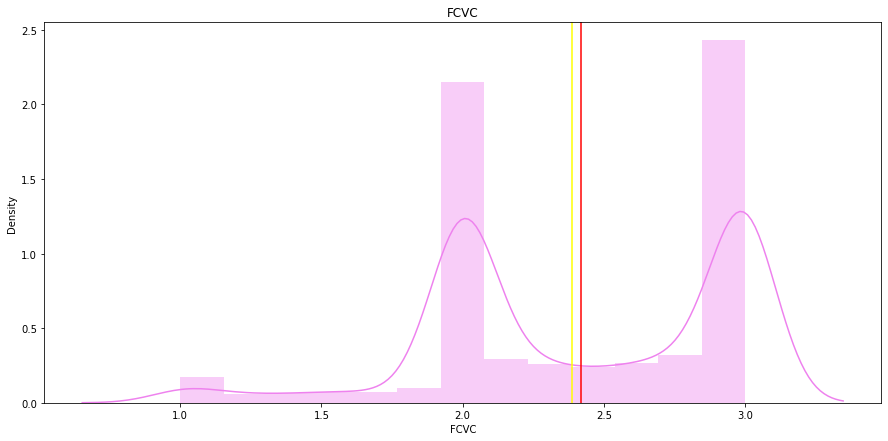

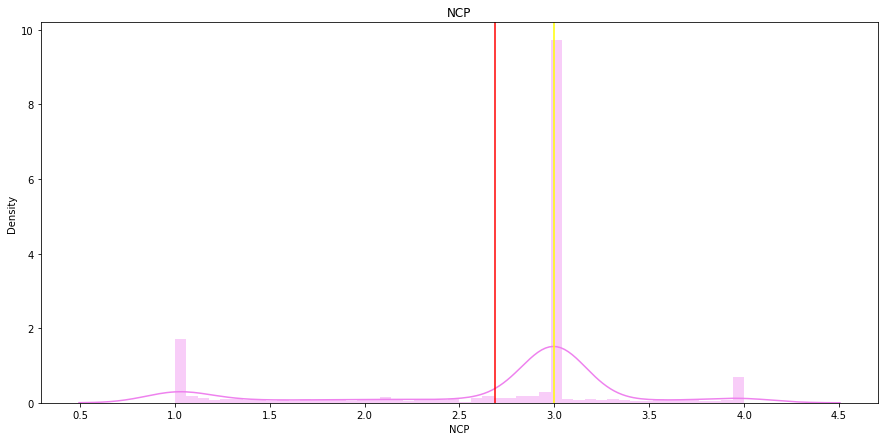

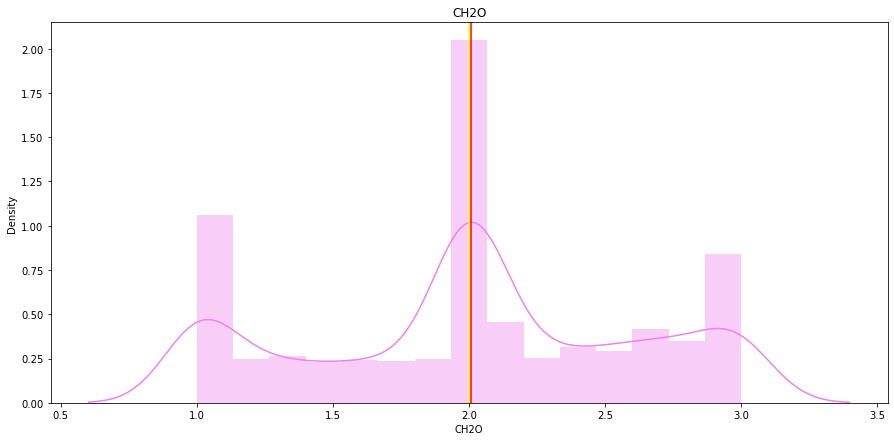

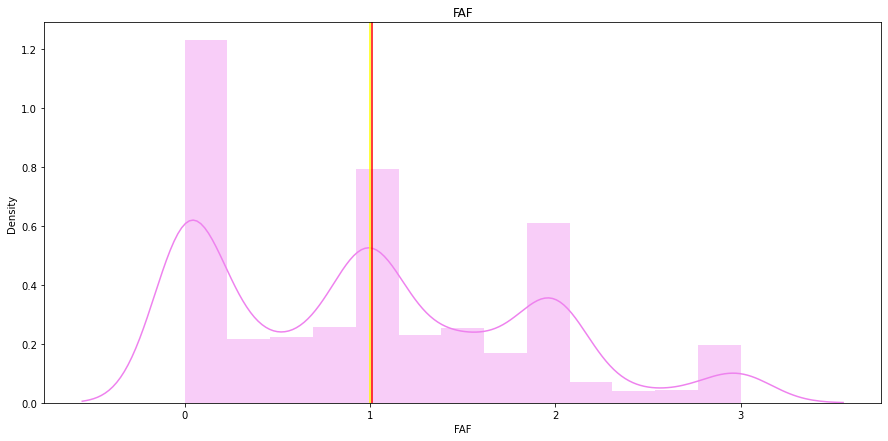

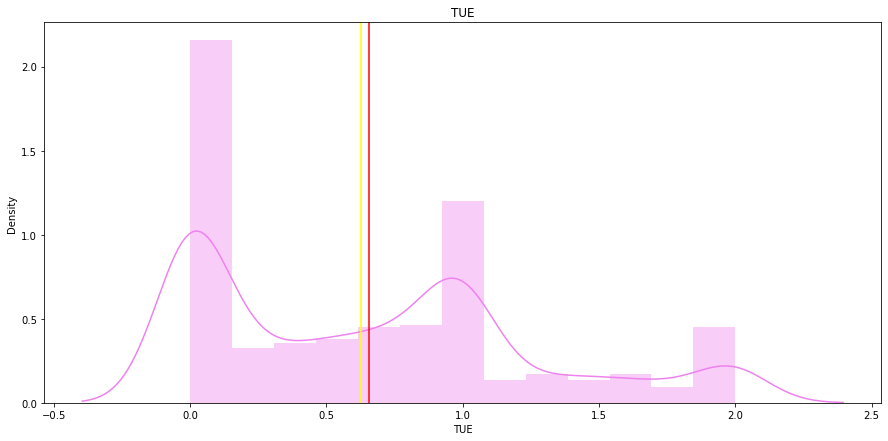

In [9]:
for i in df_num:
    plt.figure(figsize = (15,7))
    plt.title(i.upper())
    sns.distplot(df[i], color='violet')
    plt.axvline(x = np.mean(df[i]), color = 'red')
    plt.axvline(x = np.median(df[i]), color = 'yellow')
    plt.show()

### Categoric

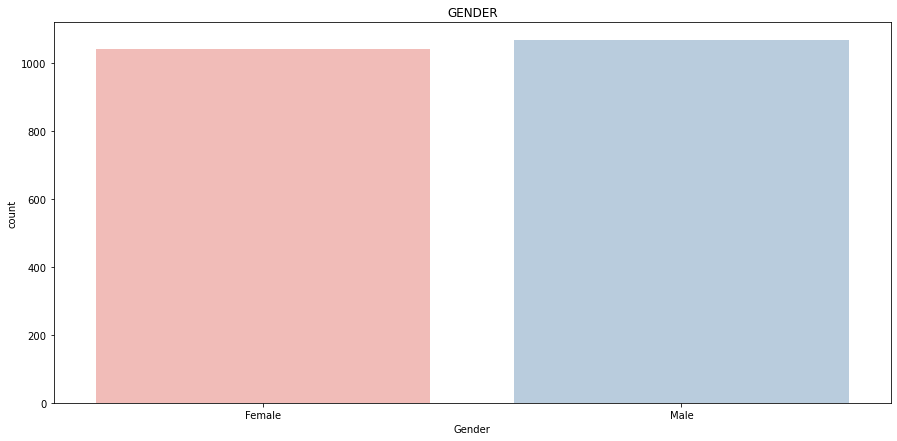

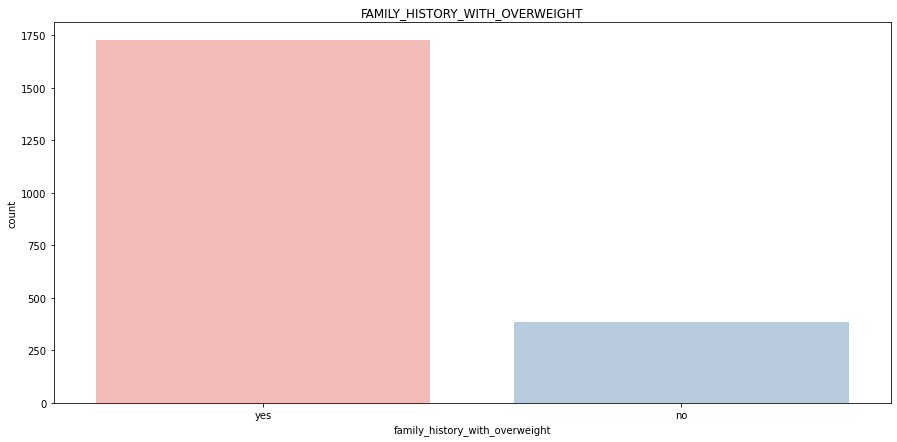

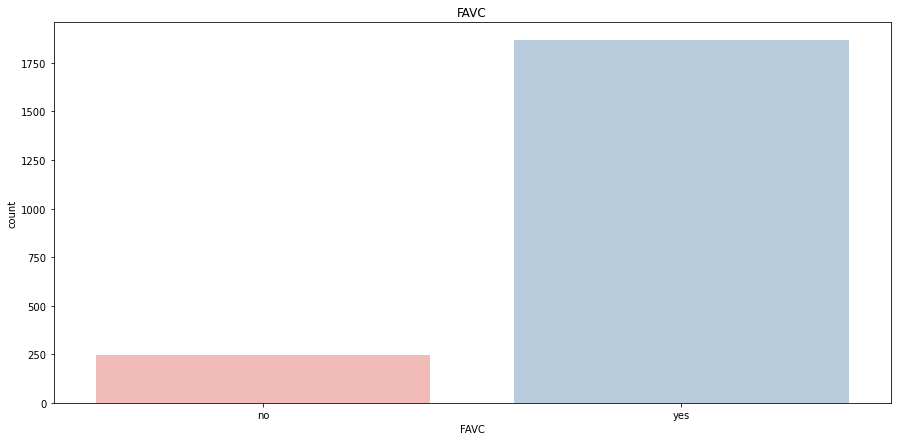

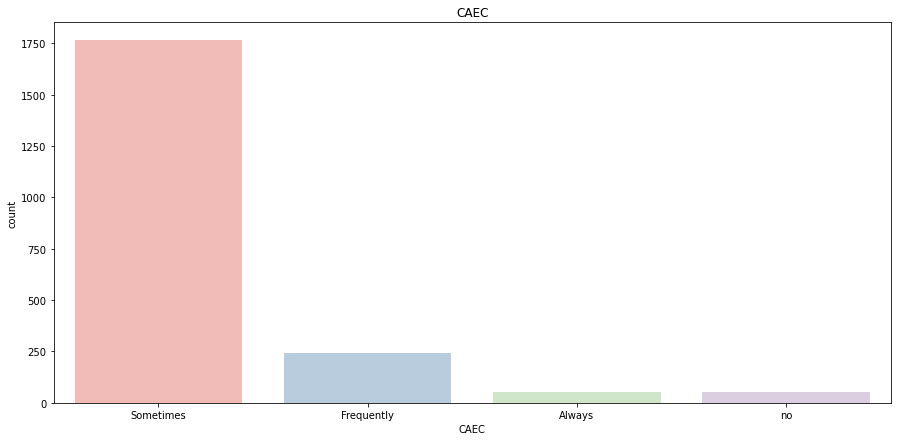

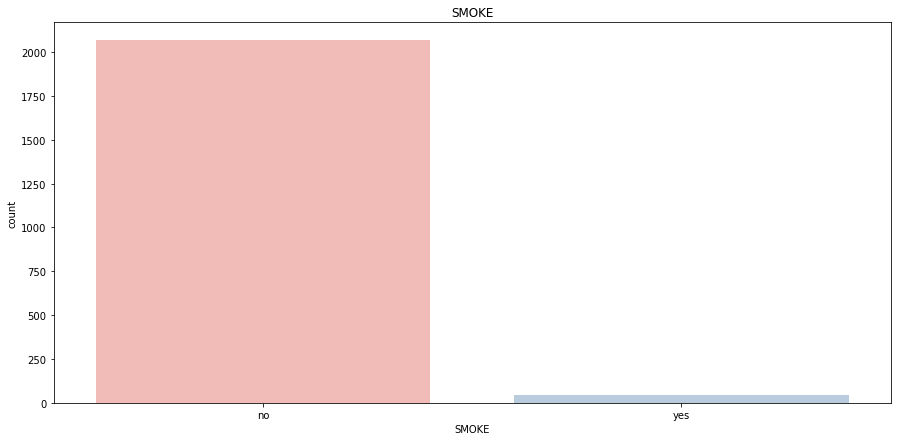

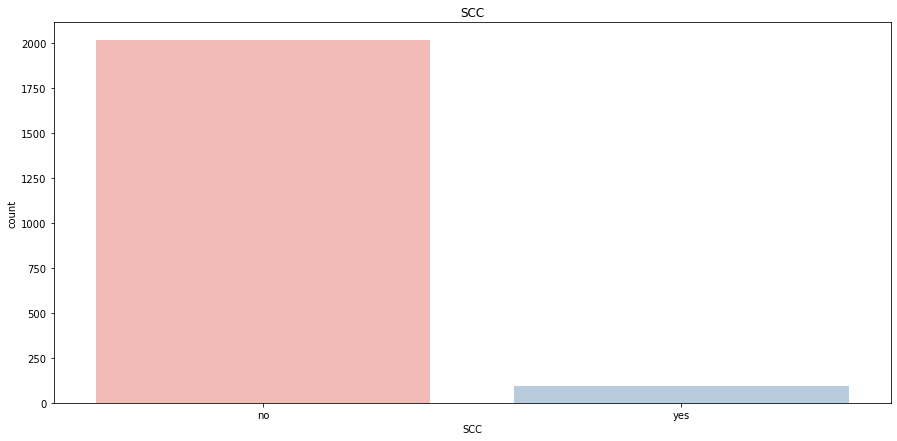

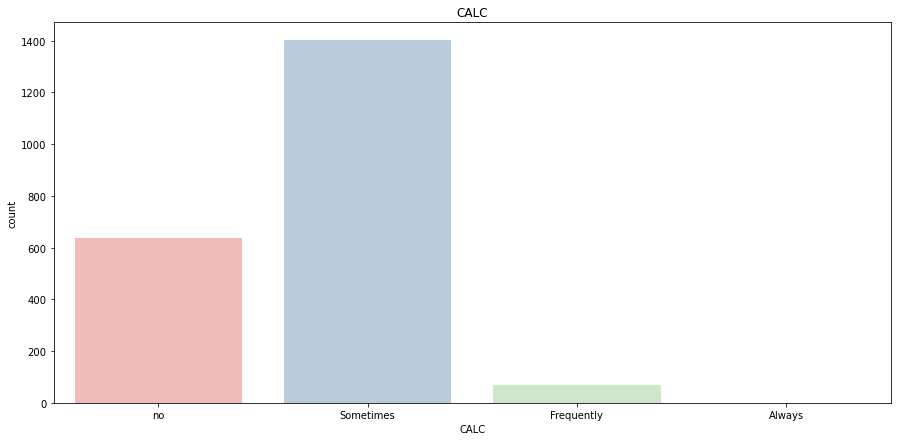

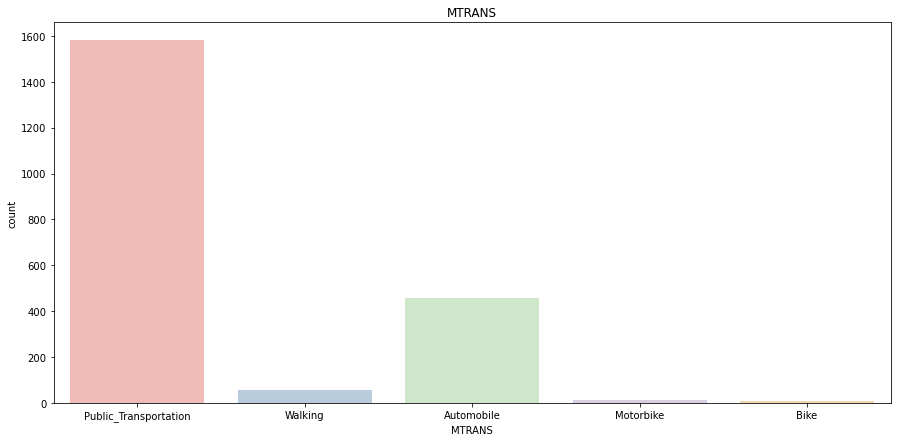

In [10]:
for i in df_cat.drop([target_variable], axis = 1):
    plt.figure(figsize = (15,7))
    plt.title(i.upper())
    sns.countplot(df[i], palette='Pastel1')
    plt.show()

### Target Variable

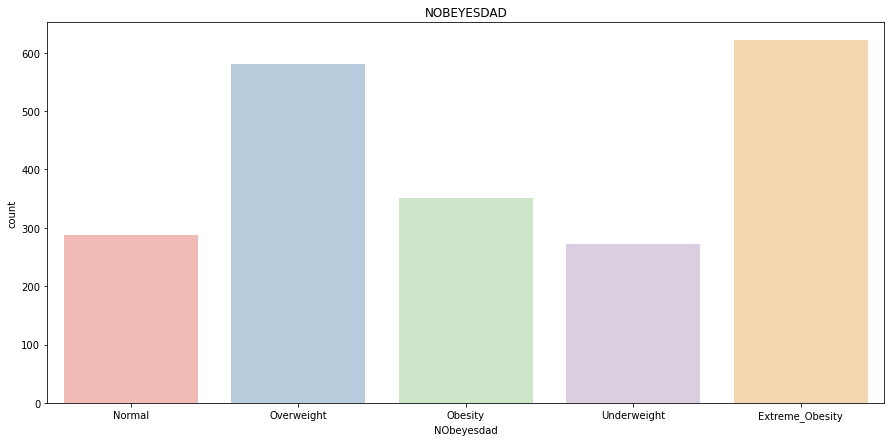

In [11]:
plt.figure(figsize = (15,7))
plt.title(target_variable.upper())
sns.countplot(df[target_variable], palette='Pastel1')
plt.show()

We se a fairly balanced target variable with multiple classes

## Bivariate

### Numeric

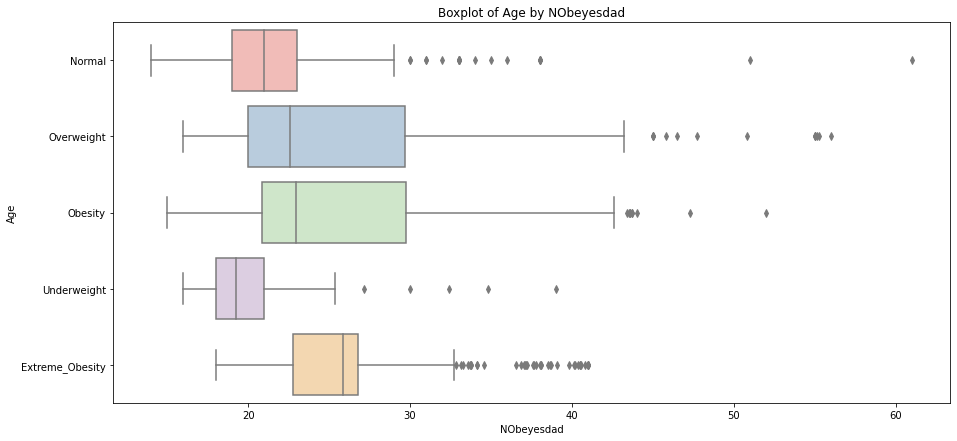

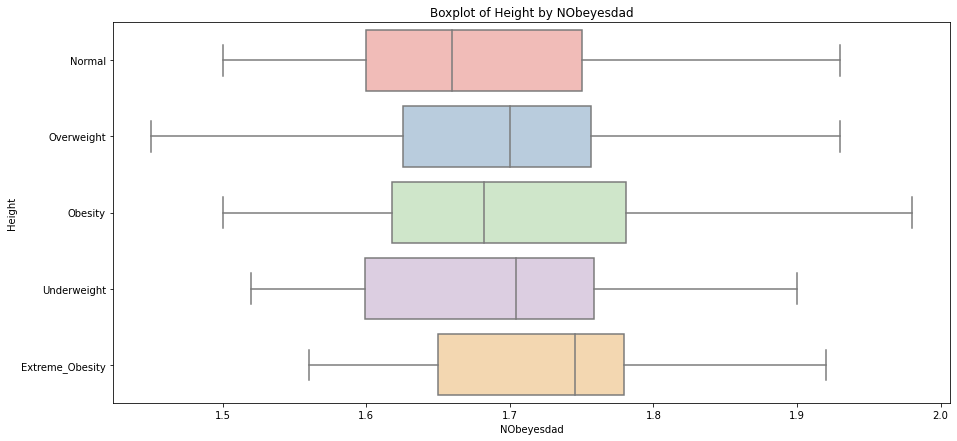

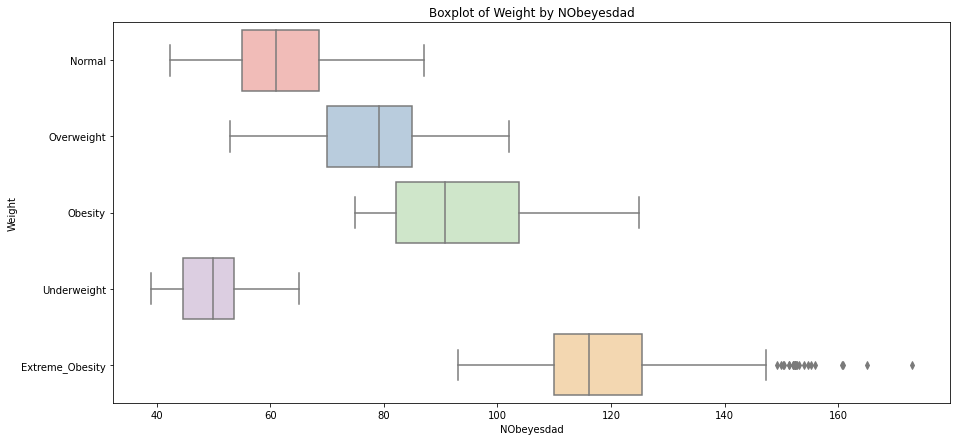

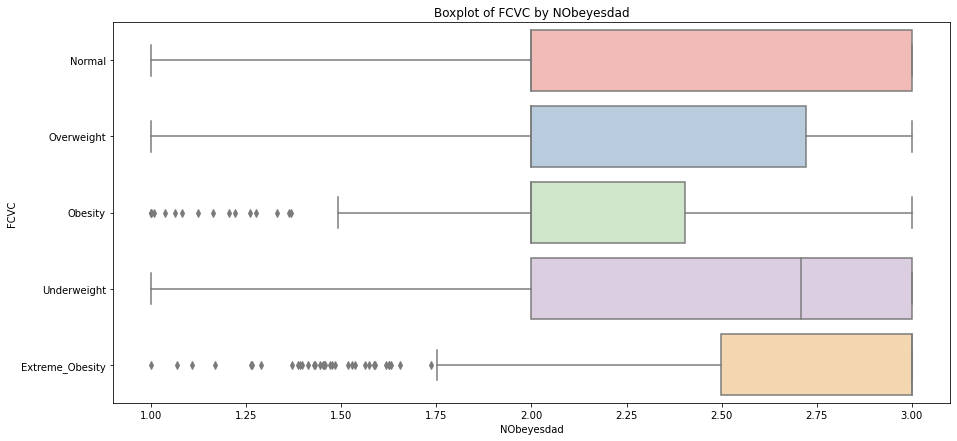

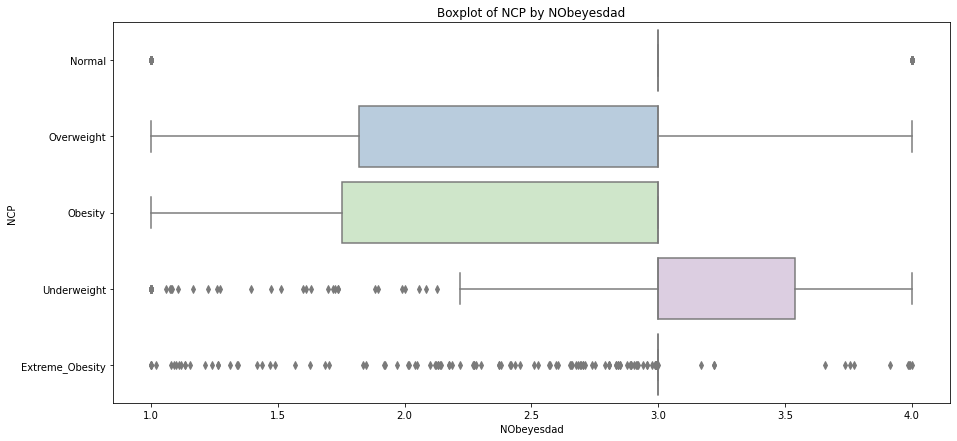

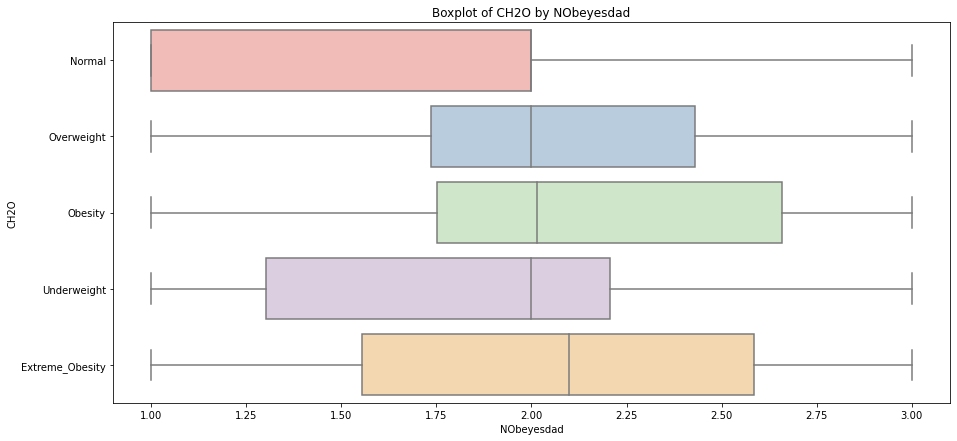

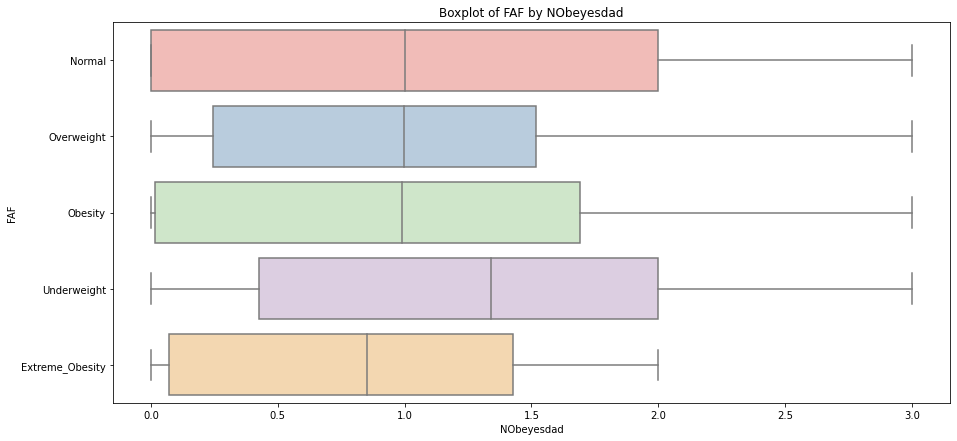

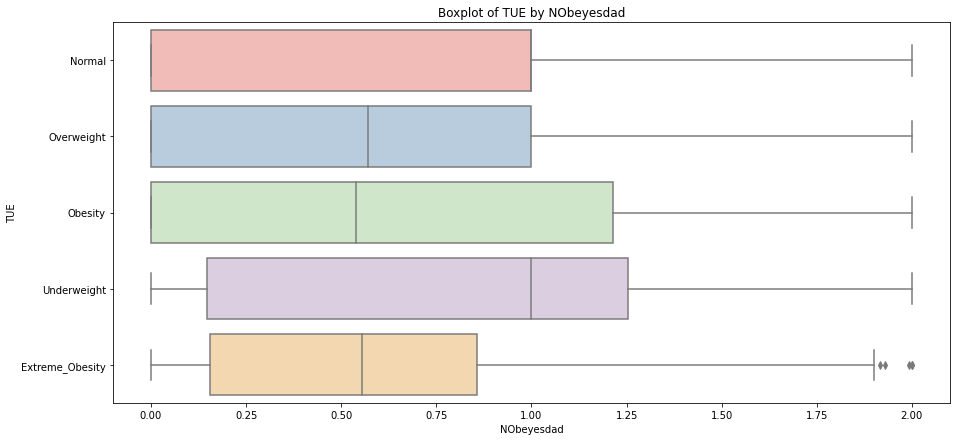

In [12]:
for column in df_num.columns:
    # Create a boxplot for each column against the target variable
    plt.figure(figsize=(15,7))
    sns.boxplot(y=target_variable, x=column, data=df, palette='Pastel1')
    
    # Set plot title and labels
    plt.title(f"Boxplot of {column} by {target_variable}")
    plt.xlabel(target_variable)
    plt.ylabel(column)
    
    # Show the plot
    plt.show()

### Categoric

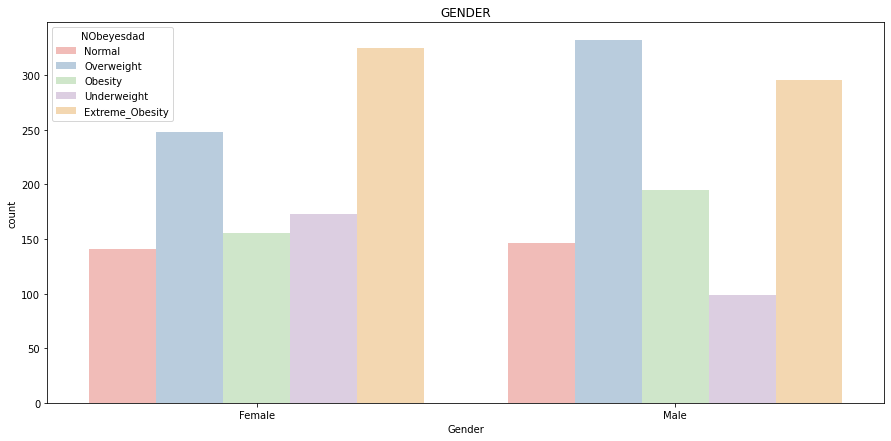

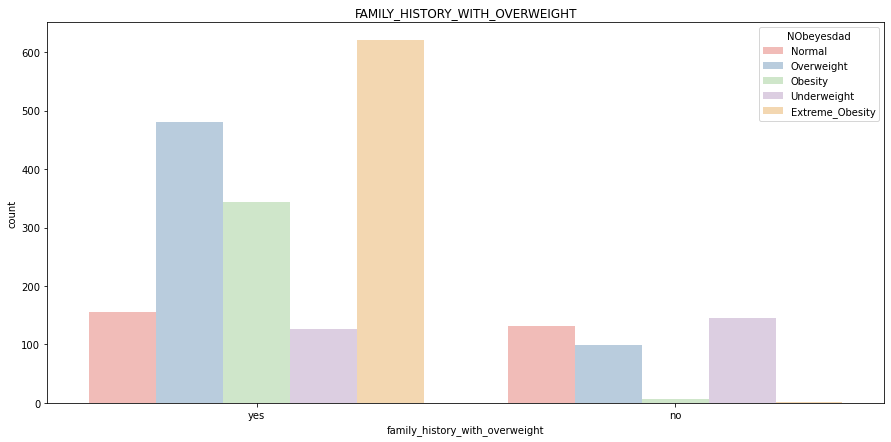

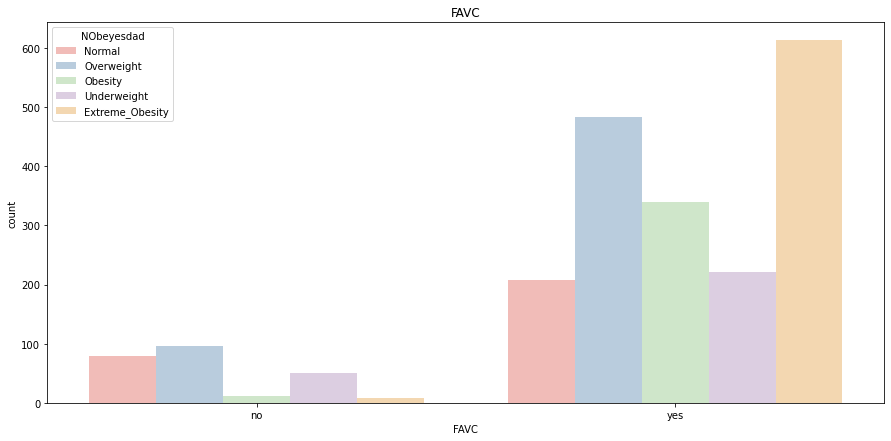

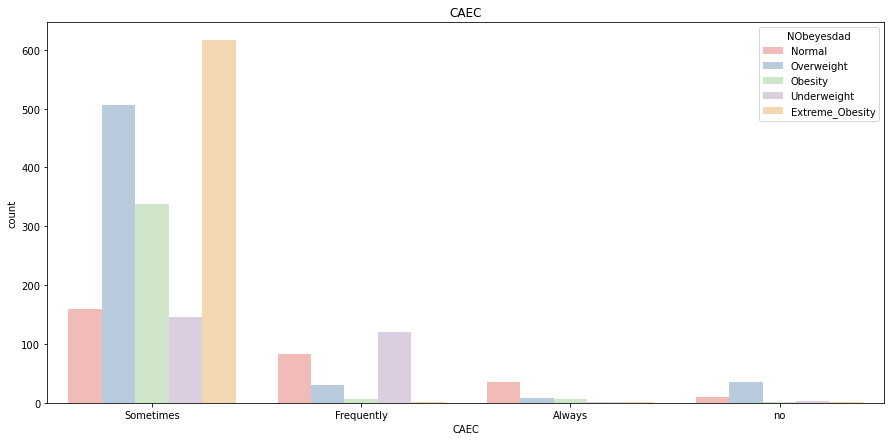

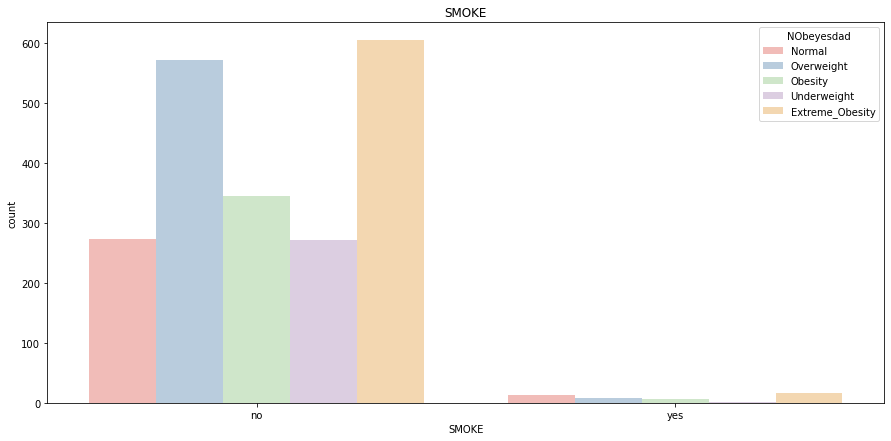

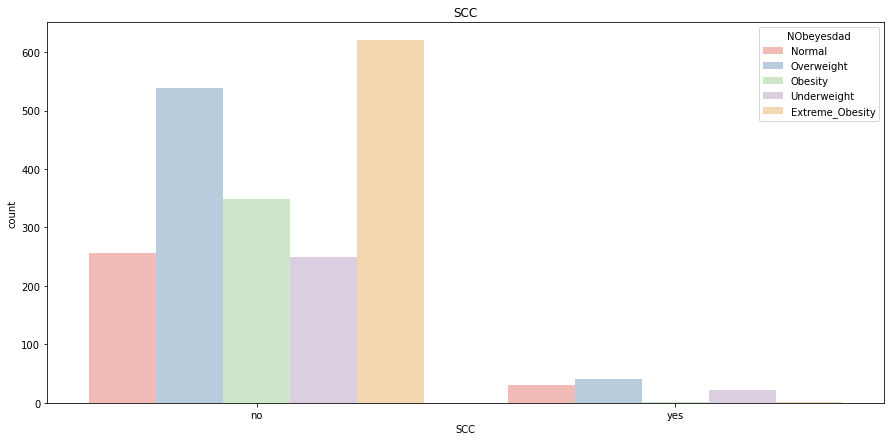

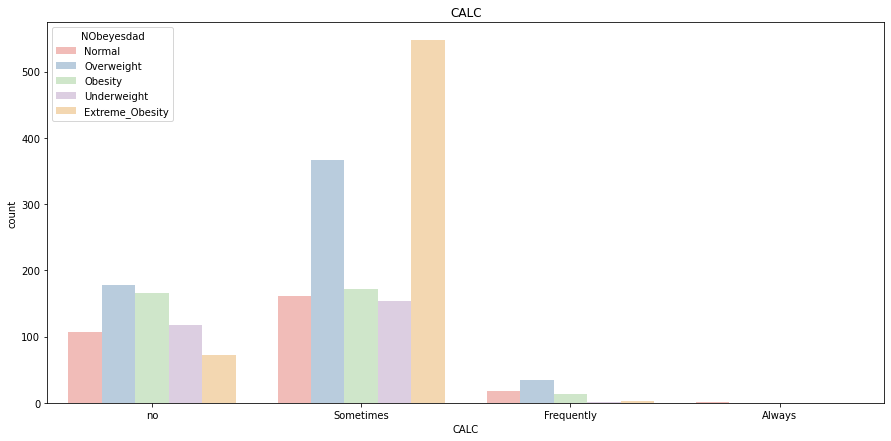

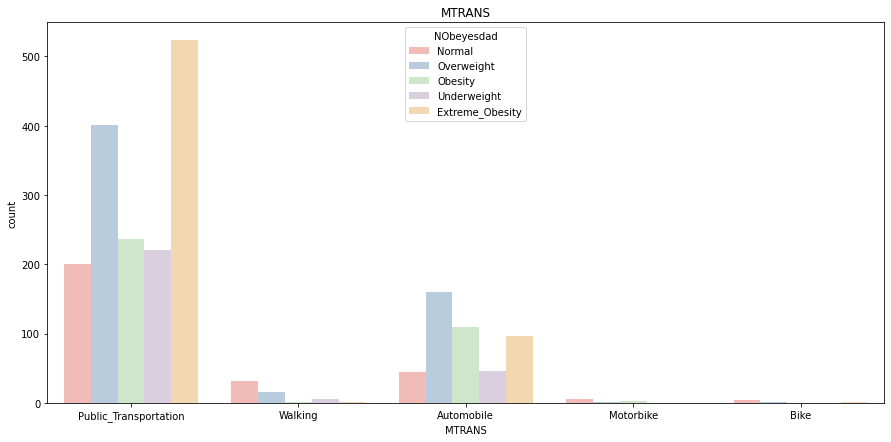

In [13]:
for i in df_cat.drop([target_variable], axis = 1):
    plt.figure(figsize = (15,7))
    plt.title(i.upper())
    sns.countplot(df[i], palette='Pastel1', hue = df[target_variable])
    plt.show()

## Correlation among numeric columns

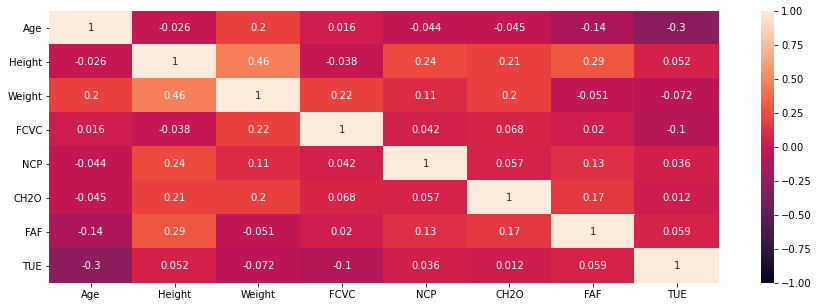

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df_num.corr(), annot = True, vmax = 1, vmin = -1)
plt.show()

We dont see little correlation among columns. And from here it apears that the numeric features are largely independent of each other.

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df, train_size= 0.7, random_state=10)

In [17]:
train.shape, test.shape

((1477, 17), (634, 17))

# Data Preparation

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Encoding

In [19]:
for i in train.select_dtypes(np.object).columns:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])
    test[i] = le.transform(test[i])

### Separating X and Y features

In [20]:
xtrain = train.iloc[:,:-1]
ytrain = train.iloc[:,-1]
xtest = test.iloc[:,:-1]
ytest = test.iloc[:,-1]

### Scaling

In [21]:
for i in xtrain.columns:
    xtrain_arr = xtrain[i].values.reshape(-1,1)
    xtest_arr = xtest[i].values.reshape(-1,1)
    ss = StandardScaler()
    ss.fit(xtrain_arr)
    xtrain[i] = ss.transform(xtrain_arr)
    xtest[i] = ss.transform(xtest_arr)

# Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

For training a model on the data. We will try out four different classification algorithms all of which use different approaches for classification:

* **OVR Logistic Regression:** Multiclass classification using 'One versus Rest' method. Logistic Regression is based on the concept of best fit line
* **Decision Tree:** Is a tree based approach to classification. It basically creates an elaborate if-else statement based on different criterion.
* **Random Forest Classifier:** Is a bagging technique that uses Decision Tree 'stumps' as its base model.
* **XG Boost Classifier:** Extreme Gradient Boosting is a boosting based ensemble technique that iteratively adjusts weights of each feature.

In [23]:
models = {'LogisticRegression':LogisticRegression(multi_class='ovr'),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'XGBoost':XGBClassifier()}

for name, model_obj in models.items():
    model = model_obj
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    print(name.upper())
    print(classification_report(ytest, ypred))
    print()

LOGISTICREGRESSION
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       189
           1       0.61      0.35      0.44        86
           2       0.71      0.56      0.63        94
           3       0.70      0.85      0.77       188
           4       0.83      0.94      0.88        77

    accuracy                           0.79       634
   macro avg       0.76      0.74      0.74       634
weighted avg       0.78      0.79      0.78       634


DECISIONTREE
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.85      0.92      0.88        86
           2       0.96      0.94      0.95        94
           3       0.96      0.96      0.96       188
           4       0.94      0.88      0.91        77

    accuracy                           0.95       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.95      0.95 

# Hyperparameter Tuning

Given the performance of different models, we chose XG Boost Classifier as our final model, and we will use Gridsearch CV to tune it to get best parameters.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Score: 0.9729202931745304


# Final Model

### Model Training

In [25]:
final_model  = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 300)

final_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Prediction

In [27]:
ypred = final_model.predict(xtest)

### Performance evaluation

In [29]:
print(classification_report(y_true = ytest, y_pred = ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       189
           1       0.92      0.93      0.92        86
           2       0.98      0.97      0.97        94
           3       0.98      0.96      0.97       188
           4       0.95      0.97      0.96        77

    accuracy                           0.97       634
   macro avg       0.96      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

